In [1]:
from N_xi_fit_funcs import *
import os
os.chdir("..")  # Moves up one level

In [ ]:
%load_ext autoreload
%autoreload
import matplotlib.pyplot as plt
import phaseco as pc

win_meth = {"method": "rho", "rho": 0.7}
pw = True

"PARAMETERS"
# WF pre-processing parameters
hpf = {
    "type": "kaiser",
    "cf": 300,
    "df": 50,
    "rip": 100,
}  # High pass filter cutoff freq, transition band width, and max allowed ripple (in dB)
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)

# Coherence Parameters
hop_s = 0.01
tau_s = 2**13 / 44100  # Everyone uses the same tau_s

xi_min_s = 0.001
delta_xi_s = 0.001

# Folders
paper_plots_folder = 'paper_analysis/Paper Plots/'
N_xi_folder = r"paper_analysis/"



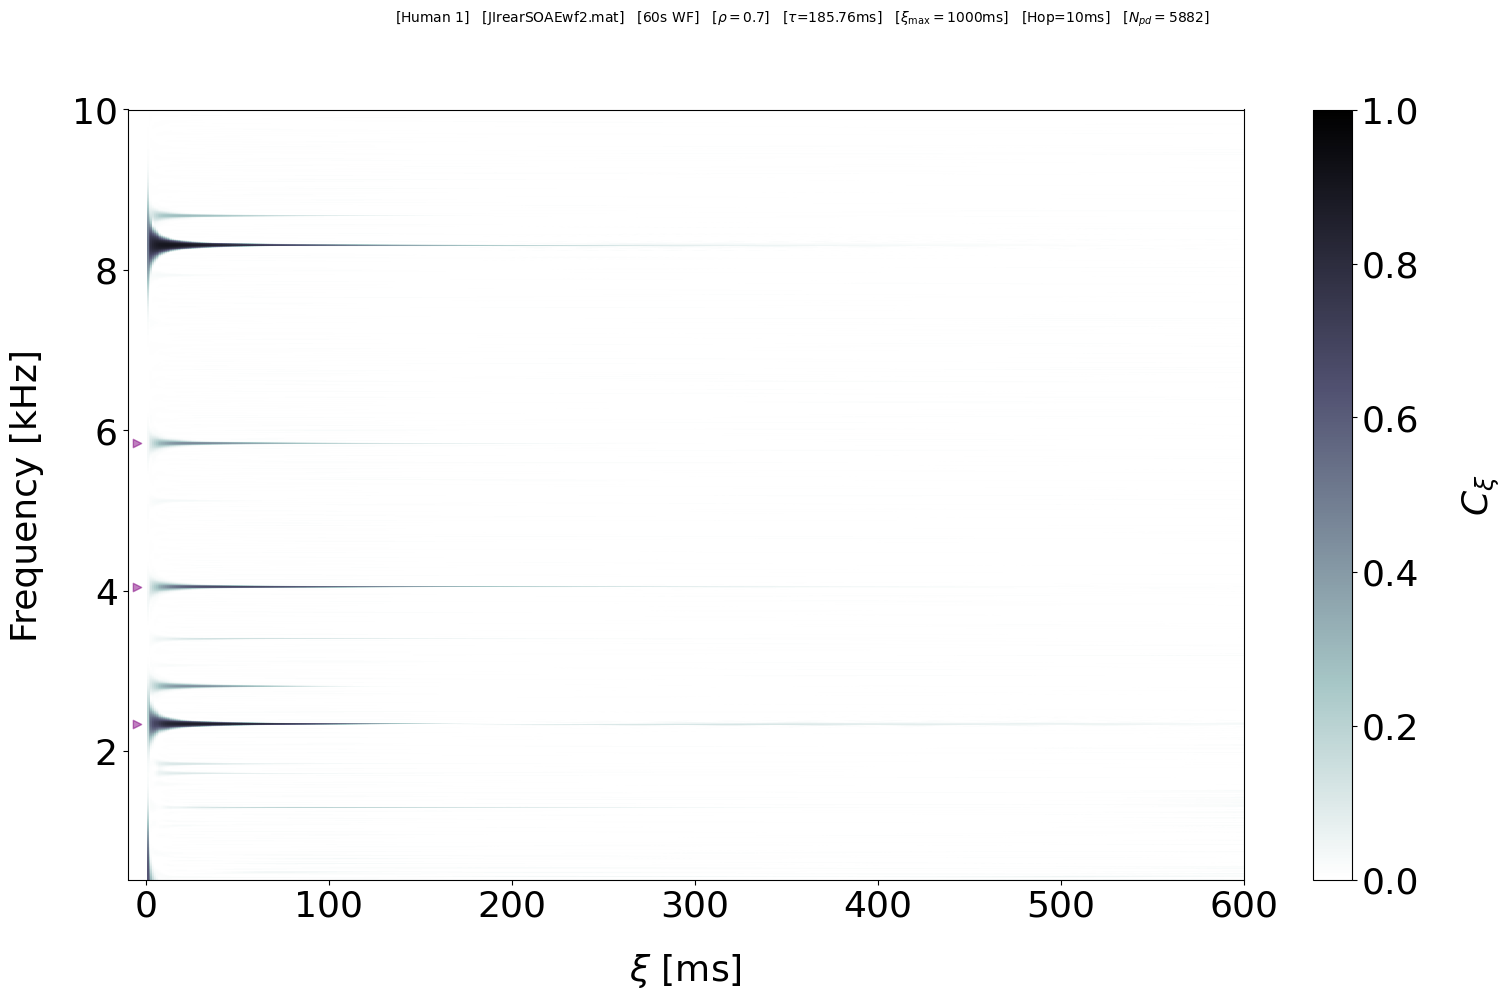

In [3]:
"Human Colossogram"

# Choose subject
species = "Human"
wf_idx = 1

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.0
hop = round(hop_s * fs)
tau = round(
    tau_s * fs
)  # This is just 2**13 for efficient FFT implementation, unless fs!=44100

# Load cgram dict
fn_id = rf"{species} {wf_idx}, PW={pw}, {pc.get_win_meth_str(win_meth)}, hop={(hop/fs)*1000:.0f}ms, tau={tau_s*1000:.0f}ms, HPF=({get_hpf_str(hpf)}), xi_max={xi_max_s*1000:.0f}ms, wf_len={wf_len_s}s, wf={wf_fn.split('.')[0]}"
pkl_fn = f"{fn_id} (Colossogram)"
pkl_folder = N_xi_folder + "Pickles/"
if os.path.exists(pkl_folder + pkl_fn + ".pkl"):
    with open(pkl_folder + pkl_fn + ".pkl", "rb") as file:
        (colossogram_dict) = pickle.load(file)
else:
    raise ValueError("We don't have that colossogram!")


# Load everything that wasn't explicitly "saved" in the filename
colossogram = colossogram_dict["colossogram"]
fn_id = colossogram_dict["fn_id"]
win_meth_str = colossogram_dict["win_meth_str"]
method_id = colossogram_dict["method_id"]
hpf_str = colossogram_dict["hpf_str"]
f = colossogram_dict["f"]
xis_s = colossogram_dict["xis_s"]
hop = colossogram_dict["hop"]
good_peak_idxs = np.argmin(
                    np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0
                )
suptitle = suptitle = rf"[{species} {wf_idx}]   [{wf_fn}]   [{wf_len_s}s WF]   {method_id}"

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()
fontsize = 26
labelpad = 20
ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

xmin = -10
xmax = 600
plt.ylim(0.4, 10)
plt.xlim(-10, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(f'{paper_plots_folder}Human Colossogram ({wf_fn.split('.')[0]}).jpg',dpi=300)

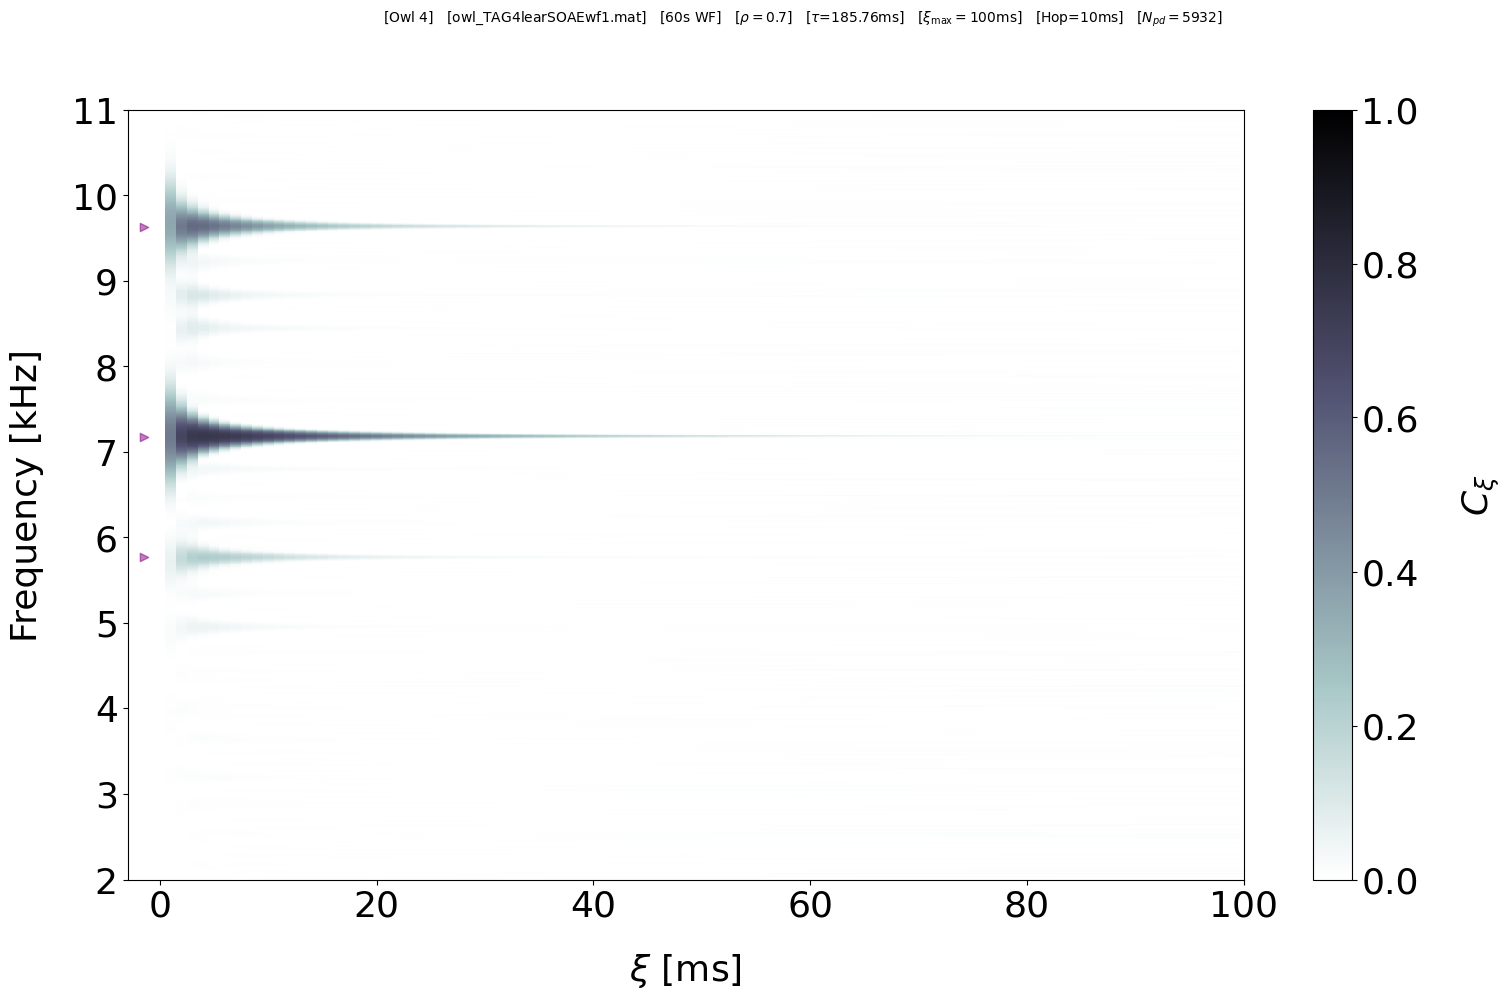

In [4]:
"Owl Colossogram"

# Choose subject
species = "Owl"
wf_idx = 4

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
hop = round(hop_s * fs)
tau = round(
    tau_s * fs
)  # This is just 2**13 for efficient FFT implementation, unless fs!=44100

# Load cgram dict
fn_id = rf"{species} {wf_idx}, PW={pw}, {pc.get_win_meth_str(win_meth)}, hop={(hop/fs)*1000:.0f}ms, tau={tau_s*1000:.0f}ms, HPF=({get_hpf_str(hpf)}), xi_max={xi_max_s*1000:.0f}ms, wf_len={wf_len_s}s, wf={wf_fn.split('.')[0]}"
pkl_fn = f"{fn_id} (Colossogram)"
pkl_folder = N_xi_folder + "Pickles/"
if os.path.exists(pkl_folder + pkl_fn + ".pkl"):
    with open(pkl_folder + pkl_fn + ".pkl", "rb") as file:
        (colossogram_dict) = pickle.load(file)
else:
    raise ValueError("We don't have that colossogram!")


# Load everything that wasn't explicitly "saved" in the filename
colossogram = colossogram_dict["colossogram"]
fn_id = colossogram_dict["fn_id"]
win_meth_str = colossogram_dict["win_meth_str"]
method_id = colossogram_dict["method_id"]
hpf_str = colossogram_dict["hpf_str"]
f = colossogram_dict["f"]
xis_s = colossogram_dict["xis_s"]
hop = colossogram_dict["hop"]
good_peak_idxs = np.argmin(
                    np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0
                )
suptitle = suptitle = rf"[{species} {wf_idx}]   [{wf_fn}]   [{wf_len_s}s WF]   {method_id}"

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()
fontsize = 26
labelpad = 20
ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(2, 11)
xmin=-3
plt.xlim(xmin, 100)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(f'{paper_plots_folder}Owl Colossogram ({wf_fn.split('.')[0]}).jpg',dpi=300)

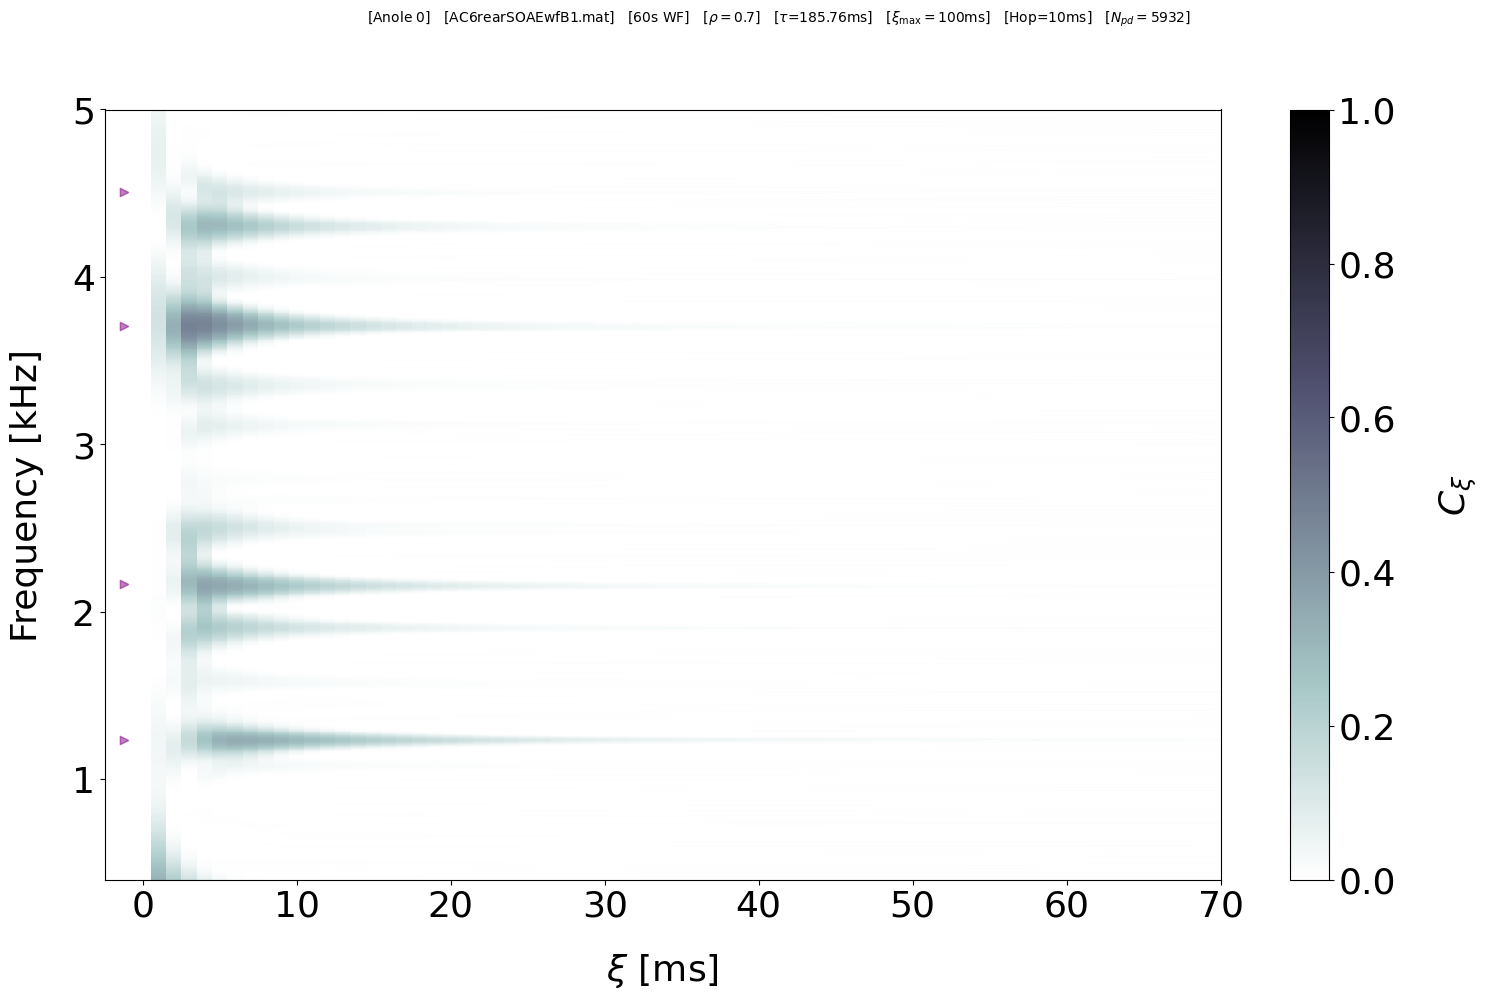

In [5]:
"Anole Colossogram"

# Choose subject
species = "Anole"
wf_idx = 0

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
hop = round(hop_s * fs)
tau = round(
    tau_s * fs
)  # This is just 2**13 for efficient FFT implementation, unless fs!=44100

# Load cgram dict
fn_id = rf"{species} {wf_idx}, PW={pw}, {pc.get_win_meth_str(win_meth)}, hop={(hop/fs)*1000:.0f}ms, tau={tau_s*1000:.0f}ms, HPF=({get_hpf_str(hpf)}), xi_max={xi_max_s*1000:.0f}ms, wf_len={wf_len_s}s, wf={wf_fn.split('.')[0]}"
pkl_fn = f"{fn_id} (Colossogram)"
pkl_folder = N_xi_folder + "Pickles/"
if os.path.exists(pkl_folder + pkl_fn + ".pkl"):
    with open(pkl_folder + pkl_fn + ".pkl", "rb") as file:
        (colossogram_dict) = pickle.load(file)
else:
    raise ValueError("We don't have that colossogram!")


# Load everything that wasn't explicitly "saved" in the filename
colossogram = colossogram_dict["colossogram"]
fn_id = colossogram_dict["fn_id"]
win_meth_str = colossogram_dict["win_meth_str"]
method_id = colossogram_dict["method_id"]
hpf_str = colossogram_dict["hpf_str"]
f = colossogram_dict["f"]
xis_s = colossogram_dict["xis_s"]
hop = colossogram_dict["hop"]
good_peak_idxs = np.argmin(
                    np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0
                )
suptitle = suptitle = rf"[{species} {wf_idx}]   [{wf_fn}]   [{wf_len_s}s WF]   {method_id}"

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()
fontsize = 26
labelpad = 20
ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(0.4, 5)
xmin=-2.5
plt.xlim(xmin, 70)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(f'{paper_plots_folder}Anole Colossogram ({wf_fn.split('.')[0]}).jpg',dpi=300)

One peak found in first 26ms of xi, starting fit here
Fitting exp decay to 3709Hz peak
Fit succeeded, but MSE=0.00013934034875545757 > mse_thresh=0.0001 — trimming and re-fitting!


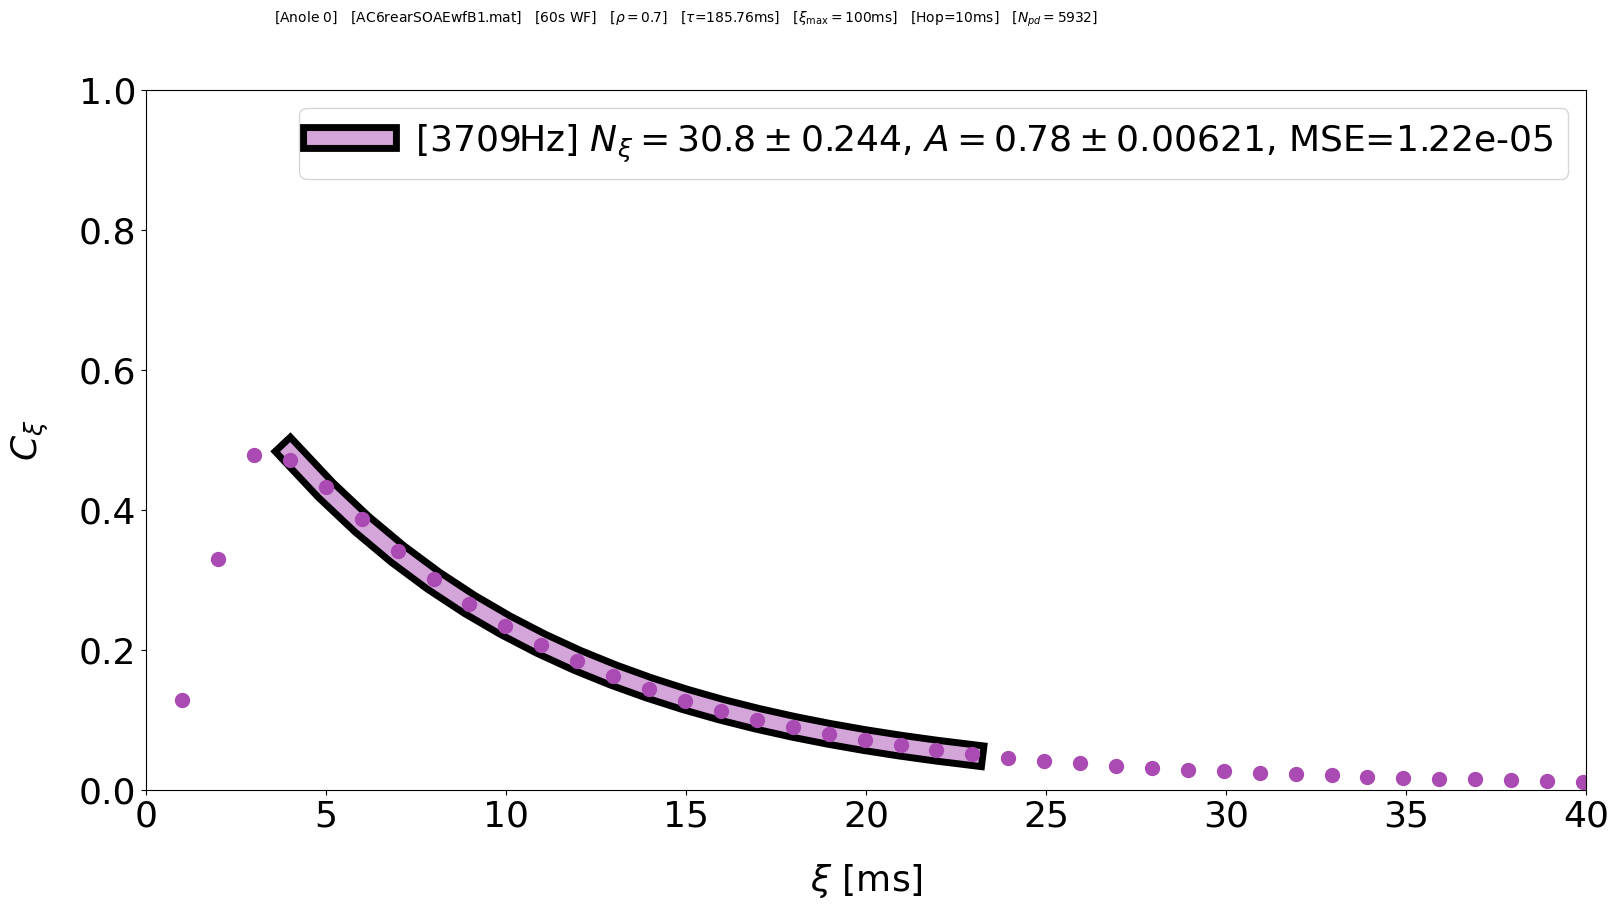

In [13]:
"Anole N_xi Fit"

# Choose subject
species = "Anole"
wf_idx = 0

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
hop = round(hop_s * fs)
tau = round(
    tau_s * fs
)  # This is just 2**13 for efficient FFT implementation, unless fs!=44100

# Load cgram dict
fn_id = rf"{species} {wf_idx}, PW={pw}, {pc.get_win_meth_str(win_meth)}, hop={(hop/fs)*1000:.0f}ms, tau={tau_s*1000:.0f}ms, HPF=({get_hpf_str(hpf)}), xi_max={xi_max_s*1000:.0f}ms, wf_len={wf_len_s}s, wf={wf_fn.split('.')[0]}"
pkl_fn = f"{fn_id} (Colossogram)"
pkl_folder = N_xi_folder + "Pickles/"
if os.path.exists(pkl_folder + pkl_fn + ".pkl"):
    with open(pkl_folder + pkl_fn + ".pkl", "rb") as file:
        (colossogram_dict) = pickle.load(file)
else:
    raise ValueError("We don't have that colossogram!")


# Load everything that wasn't explicitly "saved" in the filename
colossogram = colossogram_dict["colossogram"]
fn_id = colossogram_dict["fn_id"]
win_meth_str = colossogram_dict["win_meth_str"]
method_id = colossogram_dict["method_id"]
hpf_str = colossogram_dict["hpf_str"]
f = colossogram_dict["f"]
xis_s = colossogram_dict["xis_s"]
hop = colossogram_dict["hop"]
good_peak_idxs = np.argmin(
                    np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0
                )
suptitle = suptitle = rf"[{species} {wf_idx}]   [{wf_fn}]   [{wf_len_s}s WF]   {method_id}"

# Get N_xi_fit
f0 = 3709

# Fitting Parameters
mse_thresh = 0.0001 # Decay start is pushed forward xi by xi until MSE thresh falls below this value
trim_step = 1
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1
stop_fit = 'frac' # stops fit when it reaches a fraction of the fit start value
stop_fit_frac = 0.1 # aforementioned fraction

N_xi, N_xi_dict = get_N_xi(
    xis_s,
    f,
    colossogram,
    f0,
    mse_thresh=mse_thresh,
    stop_fit=stop_fit,
    stop_fit_frac=stop_fit_frac,
    A_max=A_max,
    A_const=A_const,
)

# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color="#AA4BB3", plot_noise_floor=False, lw_fit=10, lw_stroke=10, s_signal=100)
fontsize = 26
labelpad = 20
ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(0, 40)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(f'{paper_plots_folder}Anole N_xi Fit ({wf_fn.split('.')[0]}).jpg',dpi=300)

One peak found in first 250ms of xi, starting fit here
Fitting exp decay to 904Hz peak


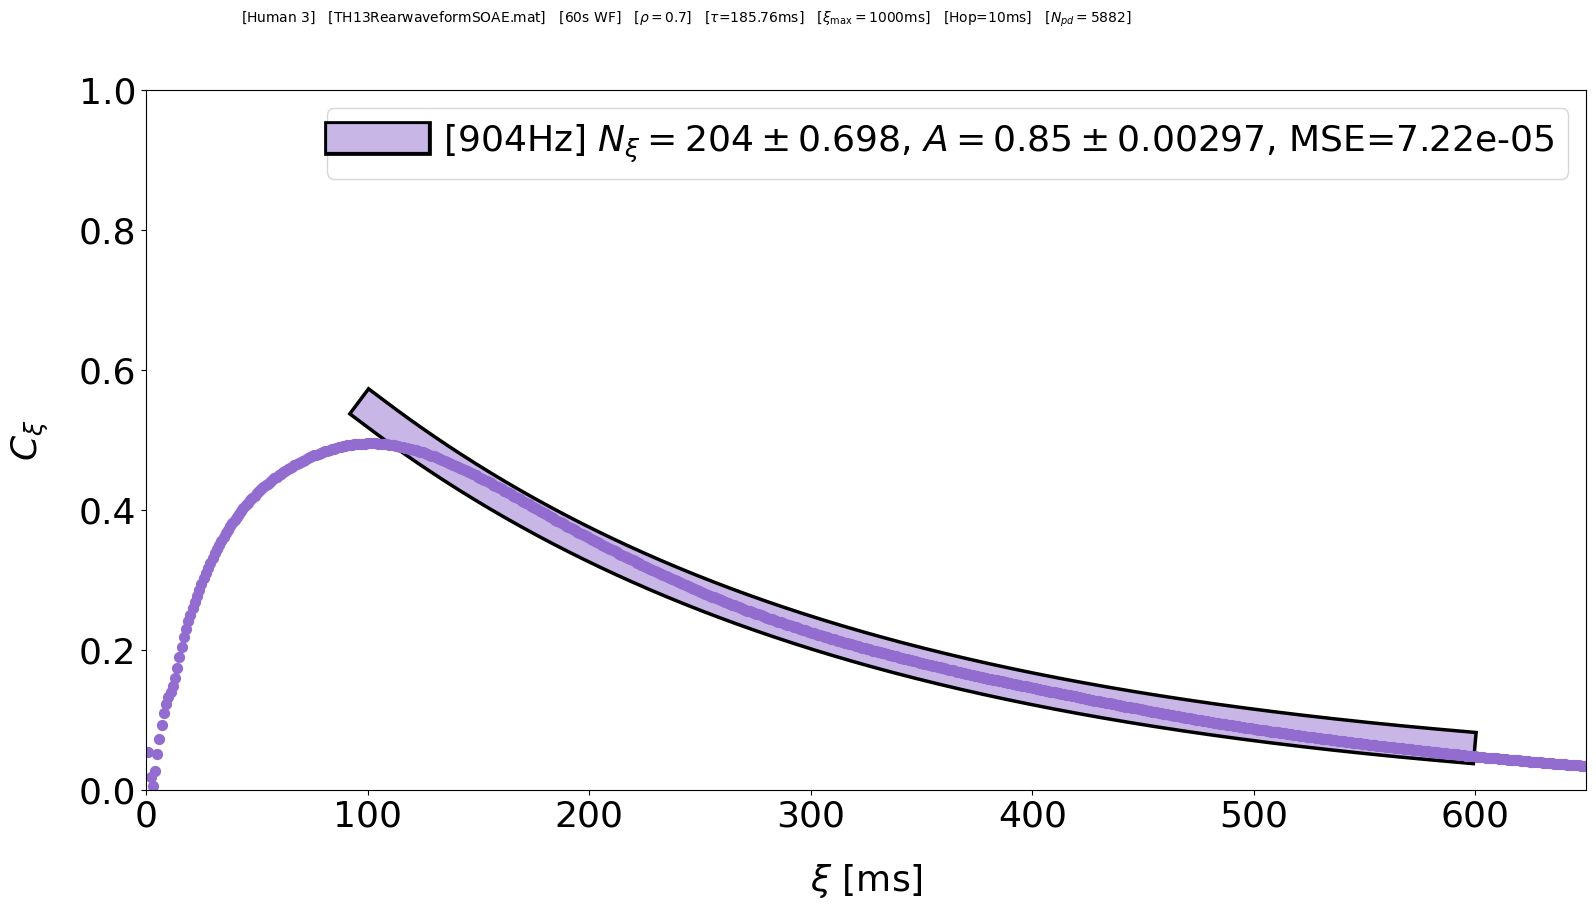

In [14]:
"Human N_xi Fit"

# Choose subject
species = "Human"
wf_idx = 3

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.0
hop = round(hop_s * fs)
tau = round(
    tau_s * fs
)  # This is just 2**13 for efficient FFT implementation, unless fs!=44100

# Load cgram dict
fn_id = rf"{species} {wf_idx}, PW={pw}, {pc.get_win_meth_str(win_meth)}, hop={(hop/fs)*1000:.0f}ms, tau={tau_s*1000:.0f}ms, HPF=({get_hpf_str(hpf)}), xi_max={xi_max_s*1000:.0f}ms, wf_len={wf_len_s}s, wf={wf_fn.split('.')[0]}"
pkl_fn = f"{fn_id} (Colossogram)"
pkl_folder = N_xi_folder + "Pickles/"
if os.path.exists(pkl_folder + pkl_fn + ".pkl"):
    with open(pkl_folder + pkl_fn + ".pkl", "rb") as file:
        (colossogram_dict) = pickle.load(file)
else:
    raise ValueError("We don't have that colossogram!")


# Load everything that wasn't explicitly "saved" in the filename
colossogram = colossogram_dict["colossogram"]
fn_id = colossogram_dict["fn_id"]
win_meth_str = colossogram_dict["win_meth_str"]
method_id = colossogram_dict["method_id"]
hpf_str = colossogram_dict["hpf_str"]
f = colossogram_dict["f"]
xis_s = colossogram_dict["xis_s"]
hop = colossogram_dict["hop"]
good_peak_idxs = np.argmin(
                    np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0
                )
suptitle = suptitle = rf"[{species} {wf_idx}]   [{wf_fn}]   [{wf_len_s}s WF]   {method_id}"

# Get N_xi_fit
f0 = 904

# Fitting Parameters
mse_thresh = 0.0001 # Decay start is pushed forward xi by xi until MSE thresh falls below this value
trim_step = 1
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1
stop_fit = 'frac' # stops fit when it reaches a fraction of the fit start value
stop_fit_frac = 0.1 # aforementioned fraction

N_xi, N_xi_dict = get_N_xi(
    xis_s,
    f,
    colossogram,
    f0,
    mse_thresh=mse_thresh,
    stop_fit=stop_fit,
    stop_fit_frac=stop_fit_frac,
    A_max=A_max,
    A_const=A_const,
)

# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color="#926CCF", plot_noise_floor=False, s_signal=50, lw_fit=20, lw_stroke=5)
fontsize = 26
labelpad = 20
ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(0, 650)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(f'{paper_plots_folder}Anole N_xi Fit ({wf_fn.split('.')[0]}).jpg',dpi=300)